# Visualización con Matplotlib

Matplotlib es la librería fundamental de visualización en Python. Es una libreriía de bajo nivel, con muchísima flexibilidad, de sintaxis compleja pero muy bien documentada.

## 4. Scatter Plots
Un tipo de gráfico que vamos a utilizar mucho en la carrera es el Scatter Plot. El mismo plotea una serie de puntos en un gráfico. En general estos puntos tomarán su coordenada horizontal de una lista de valores `x` y su coordenada vertical de una lista de valores `y`.

Para trabajar con el Scatter Plot vamos a cargar el dataset de reviews de vinos, de donde tomaremos el precios y el puntaje de cada vino. Esto lo haremos usando la libreria Pandas.

Puede descargar el archivo ingresando al siguiente enlace:
https://drive.google.com/file/d/1ipkN5hyNVIs2f6t2vgQeA1RF3T_ueaFY/view?usp=sharing

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']

# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('DS_Clase_06_wine_reviews.csv', usecols = fields)
wine_reviews.head()

country  points  price         variety
0     Italy      87    NaN     White Blend
1  Portugal      87   15.0  Portuguese Red
2        US      87   14.0      Pinot Gris
3        US      87   13.0        Riesling
4        US      87   65.0      Pinot Noir

In [12]:
# Tiramos las isntancias que tienen un nan en alguno de los features.
wine_reviews.dropna(inplace=True)
wine_reviews.head()

country  points  price             variety
1  Portugal      87   15.0      Portuguese Red
2        US      87   14.0          Pinot Gris
3        US      87   13.0            Riesling
4        US      87   65.0          Pinot Noir
5     Spain      87   15.0  Tempranillo-Merlot

In [13]:
# Tomamos como coordenadas en x los precios
x = wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
y = wine_reviews.points.values

Ahora sí, vamos a graficar cada vino como un punto en el plano dado por el precio y el puntaje de la review.

[Text(0, 0.5, 'Puntaje'),
 Text(0.5, 0, 'Precio (usd)'),
 Text(0.5, 1.0, 'Precio vs. puntaje en vinos')]

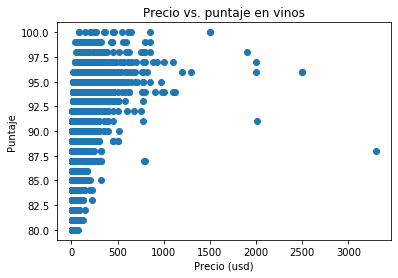

In [14]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos')

Como ven ya tenemos un primer gráfico, pero no podemos apreciarlo muy bien ya que los límites de los ejes se acomodan automaticamente de manera de que todos los puntos (vinos) entren dentro del gráfico. Entonces, teniendo algunos vinos muy caros (outliers en precio), no podemos apreciar los vinos de precio mas bajo. 

Corrijamos graficando solo vinos menores a 500 usd:

[Text(0, 0.5, 'Puntaje'),
 (0, 500),
 Text(0.5, 0, 'Precio (usd)'),
 Text(0.5, 1.0, 'Precio vs. puntaje en vinos')]

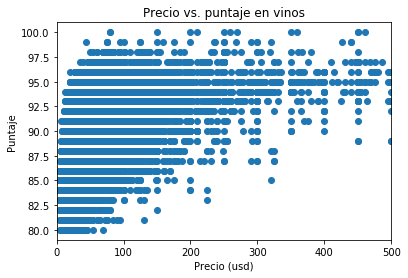

In [15]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos', xlim = (0,500))

## Ejercicio
1. ¿Por qué cree que se forman esas líneas horizontales en el gráfico?
2. ¿Qué conclusiones pueden sacar sobre la relación de precio y puntaje observando este gráfico?
3. Tome solo los vinos realizados en Argentina (recuerde usar una máscara) y realice nuevamente un scatter plot de precio vs puntaje para estos vinos.

In [ ]:
ARG_wine_reviews = COMPLETAR

In [18]:
# Tomamos como coordenadas en x los precios
precio_arg = ARG_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_arg = ARG_wine_reviews.points.values

NameError: name 'ARG_wine_reviews' is not defined

In [ ]:
COMPLETAR

Vamos a agregar más información al gráfico. Además de los vinos Argentinos, vamos a graficar también los vinos chilenos.

In [16]:
CHI_wine_reviews = wine_reviews[wine_reviews['country']=='Chile']
# Tomamos como coordenadas en x los precios
precio_chi = CHI_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_chi = CHI_wine_reviews.points.values

Para identificar los vinos de los dos paises, vamos a agregar una leyenda al gráfico. Y como tenemos muchos puntos que se superponen, vamos graficar a puntos semitransparentes. Esto lo logramos con el argumento `alpha` al método `scatter`.

NameError: name 'precio_arg' is not defined

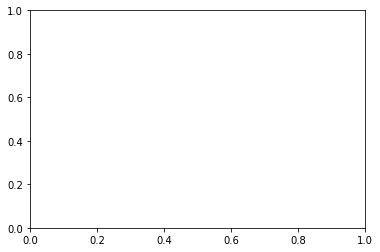

In [17]:
fig = plt.figure()
ax = plt.axes()

# Graficamos putnos semi transparentes, cada uno con el label adecuado
ax.scatter(precio_arg, puntos_arg, label = 'Vinos Argentinos',alpha = 0.3)
ax.scatter(precio_chi, puntos_chi, label = 'Vinos Chilenos',alpha = 0.3)

ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos', xlim = (0,250))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='lower right', shadow=True, fontsize=13)

## 5. Histogramas

Matplotlib también nos permite graficar fácilmente histogramas mediante la función `hist`. Veamos un primer ejemplo, donde creamos una serie de 1000 valores a partir de una distribución gaussiana en el vector `valores`:

In [ ]:
# Elejimos una distribución con centro en 20 y una desviación igual a 4
mu = 20  # Media de la distribución
sigma = 4  # Desviación Estandar
valores = mu + sigma * np.random.randn(1000)

# Imprimimos la media y la desviación de los valores generados
print('Media:',np.mean(valores))
print('Desvio Estandar:',np.std(valores))
# Recuerden que cuantos mas valores sampleen, 
# mas se aproximaran estos valores a los de la distribución.

Ahora vamos a graficar un histograma para estos valores.

In [ ]:
# Aca decidimos la cantidad de bines que queremos tomar
num_bins = 50

# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Ploteamos el histograma
n, bins, _ = ax.hist(valores, bins = num_bins)

### Ejercicio: 

1. Repitan el histograma anterior, pero esta vez cambiando el número de `bins`. Por ejemplo, probar con 5, 50, 500 y 5000. ¿Cuál les parece la opción más adecuada? ¿De qué dependará el número de bins adecuado a seleccionar?

2. Prueben qué sucede si no le pasan el argumento `bins` a la función. Busquen en la bibliografía de la librería que es lo que hace por default la función.

**Nota**: la función `hist` además nos devuelve dos vectores relevantes. El vector `n` donde nos especifica el número de cuentas de cada bin (columna) del histograma. Y el vector `bins`, que nos dice los límites de estos bines (donde empieza y termina cada columna. Noten que el vector 'bins' tiene un largo igual a `len(n)+1`.

Como último ejemplo, vamos a graficar el histograma de precios correspondientes a los vinos argentinos con una calificación de 85 y los vamos a comparar al precio de los vinos argentinos con una calificación de 90.

In [ ]:
# Seleccionamos los vinos con puntaje igual a 85
ARG_wine_85 = ARG_wine_reviews[ARG_wine_reviews['points']==85]
# Seleccionamos los vinos con puntaje igual a 85
ARG_wine_90 = ARG_wine_reviews[ARG_wine_reviews['points']==90]

# Armamos los vectores con los precios de cada vino
precios_arg_85 = ARG_wine_85.price.values
precios_arg_90 = ARG_wine_90.price.values

print('Cantidad de vinos de 85:',len(precios_arg_85))
print('Cantidad de vinos de 90:',len(precios_arg_90))

In [ ]:
# Definimos la cantidad de bins para cada grupo
n_bins_85 = 17
n_bins_90 = 25

# Creamos la figura y los ejes
fig, ax = plt.subplots()

n, bins, _ = ax.hist(precios_arg_85, n_bins_85, facecolor='g', alpha=0.5, label='Puntaje de 85')
n, bins, _ = ax.hist(precios_arg_90, n_bins_90, facecolor='b', alpha=0.5, label='Puntaje de 90')

ax.set(xlabel='Precio (usd)', ylabel='Cuentas',
       title='Distribución de Precios de Vinos Argentinos', xlim = (0,75))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='upper right', shadow=True, fontsize=13)